## 0. Importing Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             roc_auc_score, confusion_matrix, roc_curve)

## 1. Loading of the dataset

In [9]:
# Generating Sample Data
np.random.seed(42)
data_size = 1000
data = pd.DataFrame({
    'person_income': np.random.normal(50000, 15000, data_size),
    'credit_score': np.random.normal(650, 50, data_size),
    'loan_amnt': np.random.normal(15000, 5000, data_size),
    # Target: 0 = Paid, 1 = Default
    'loan_status': np.random.randint(0, 2, data_size) 
})



## 2. Preparation of the dataset

In [10]:
# Preprocessing
X = data[['person_income', 'credit_score', 'loan_amnt']]
y = data['loan_status']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale data (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. Definition of the model

In [11]:
# Train Model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## 4. Evaluation of the model

In [12]:
# Evaluate
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print(f"Accuracy:  {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall:    {recall_score(y_test, y_pred):.2f}")
print(f"AUC Score: {roc_auc_score(y_test, y_prob):.2f}")

Accuracy:  0.59
Precision: 0.59
Recall:    0.68
AUC Score: 0.60


## 5. Presentation of results

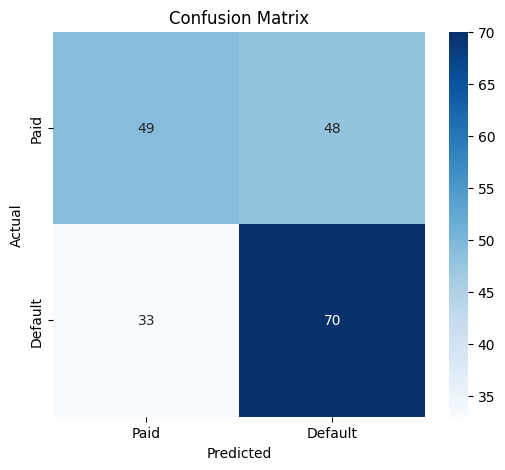

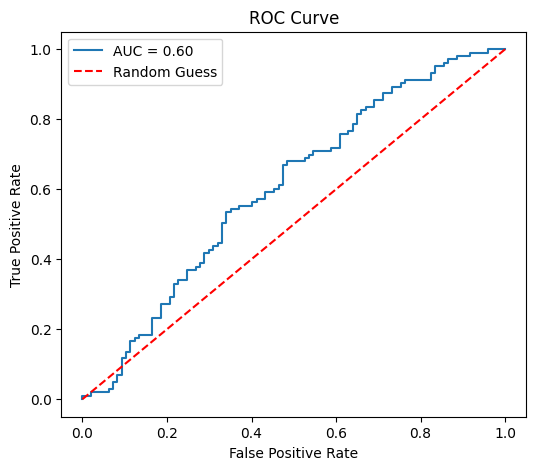

In [13]:
# Visualize Predictions
# Plot 1: Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Paid', 'Default'],
            yticklabels=['Paid', 'Default'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot 2: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_prob):.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess') # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()